## Checks book for final assignment

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
tickets = pd.read_csv(f"D:/Docs/train_1.csv", encoding='mac_roman')
#tickets = pd.read_csv(f"D:/SYED/Docs/train.csv", encoding='mac_roman')

In [15]:
tickets.head(10)

,ticket_id,city,ticket_issued_date,disposition,fine_amount,admin_fee,state_fee,late_fee,judgment_amount,balance_due,payment_status,compliance
0,22056,CHICAGO,16-03-04 11:40,Responsible,250.0,20,10,25.0,305.0,305.0,NO PAYMENT APPLIED,0.0
1,27586,Detroit,23-04-04 12:30,Responsible,750.0,20,10,75.0,855.0,75.0,PAID IN FULL,1.0
2,22062,Detroit,26-04-04 13:40,Not responsible,250.0,0,0,0.0,0.0,0.0,NO PAYMENT APPLIED,NaN
3,22084,Detroit,26-04-04 13:30,Not responsible,250.0,0,0,0.0,0.0,0.0,NO PAYMENT APPLIED,NaN
4,22093,Detroit,26-04-04 13:00,Not responsible,250.0,0,0,0.0,0.0,0.0,NO PAYMENT APPLIED,NaN
5,22046,LOG BEACH,01-05-04 11:50,Responsible,250.0,20,10,25.0,305.0,305.0,NO PAYMENT APPLIED,0.0
6,18738,Clinton,14-06-04 14:15,Responsible,750.0,20,10,75.0,855.0,855.0,NO PAYMENT APPLIED,0.0
7,18735,Detroit,16-06-04 12:30,Responsible,100.0,20,10,10.0,140.0,140.0,NO PAYMENT APPLIED,0.0
8,18733,Detroit,16-06-04 12:25,Responsible,100.0,20,10,10.0,140.0,140.0,NO PAYMENT APPLIED,0.0
9,28204,Detroit,12-07-04 13:30,Responsible,750.0,20,10,75.0,855.0,855.0,NO PAYMENT APPLIED,0.0


In [16]:
tickets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250306 entries, 0 to 250305
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ticket_id           250306 non-null  int64  
 1   city                250306 non-null  object 
 2   ticket_issued_date  250306 non-null  object 
 3   disposition         250306 non-null  object 
 4   fine_amount         250305 non-null  float64
 5   admin_fee           250306 non-null  int64  
 6   state_fee           250306 non-null  int64  
 7   late_fee            250306 non-null  float64
 8   judgment_amount     250306 non-null  float64
 9   balance_due         250306 non-null  float64
 10  payment_status      250306 non-null  object 
 11  compliance          159880 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 22.9+ MB


In [17]:
tickets['disposition'].value_counts()

Responsible        159880
Not responsible     83096
Not Responsible      6639
PENDING               691
Name: disposition, dtype: int64

In [18]:
tickets.dropna(subset=['compliance'], how='any').shape

(159880, 12)

In [19]:
tickets['compliance'].value_counts()

0.0    148283
1.0     11597
Name: compliance, dtype: int64

<AxesSubplot:>

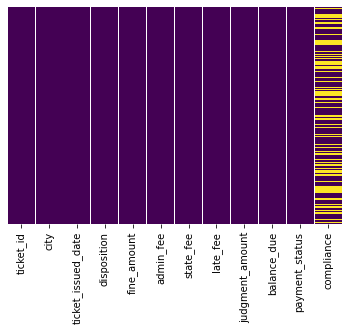

In [20]:
sns.heatmap(tickets.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [21]:
tickets.columns

Index(['ticket_id', 'city', 'ticket_issued_date', 'disposition', 'fine_amount',
       'admin_fee', 'state_fee', 'late_fee', 'judgment_amount', 'balance_due',
       'payment_status', 'compliance'],
      dtype='object')

In [27]:
tickets['disposition'].replace(['Not Responsible', 'PENDING'], [1, 2], inplace=True)

In [28]:
tickets['disposition'].value_counts()

0    159880
1     89735
2       691
Name: disposition, dtype: int64

In [29]:
tickets.describe()

,ticket_id,disposition,fine_amount,admin_fee,state_fee,late_fee,judgment_amount,balance_due,compliance
count,250306.000000,250306.000000,250305.000000,250306.000000,250306.000000,250306.000000,250306.000000,250306.000000,159880.000000
mean,152665.543099,0.364022,374.423435,12.774764,6.387382,21.494506,268.685356,222.449058,0.072536
std,77189.882881,0.486860,707.195807,9.607344,4.803672,56.464263,626.915212,606.394010,0.259374
min,18645.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7750.000000,0.000000
25%,86549.250000,0.000000,200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,152597.500000,0.000000,250.000000,20.000000,10.000000,10.000000,140.000000,25.000000,0.000000
75%,219888.750000,1.000000,250.000000,20.000000,10.000000,25.000000,305.000000,305.000000,0.000000
max,366178.000000,2.000000,10000.000000,20.000000,10.000000,1000.000000,11030.000000,11030.000000,1.000000


<AxesSubplot:>

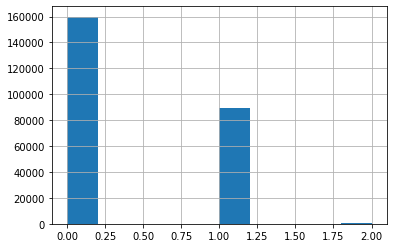

In [36]:
tickets['disposition'].hist()

In [37]:
tickets.loc[tickets['payment_status'] == 'PAID IN FULL', 'compliance'] = 1

In [40]:
tickets['payment_status'].value_counts()

NO PAYMENT APPLIED         209193
PAID IN FULL                31931
PARTIAL PAYMENT APPLIED      9182
Name: payment_status, dtype: int64

In [39]:
tickets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250306 entries, 0 to 250305
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ticket_id           250306 non-null  int64  
 1   city                250306 non-null  object 
 2   ticket_issued_date  250306 non-null  object 
 3   disposition         250306 non-null  int64  
 4   fine_amount         250305 non-null  float64
 5   admin_fee           250306 non-null  int64  
 6   state_fee           250306 non-null  int64  
 7   late_fee            250306 non-null  float64
 8   judgment_amount     250306 non-null  float64
 9   balance_due         250306 non-null  float64
 10  payment_status      250306 non-null  object 
 11  compliance          161382 non-null  float64
dtypes: float64(5), int64(4), object(3)
memory usage: 22.9+ MB


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#Feature selection is very interesting phase here where by own intuition I have to select the features
#which might give best fit for data at hand

feature_names_tickets = ['ticket_id', 'disposition', 'ticket_issued_date', 'fine_amount']
X_tickets = tickets[feature_names_tickets]
#Our target variable is compliance i.e., ticket chances of getting PAID
y_tickets = tickets['compliance']
X_train, X_test, y_train, y_test = train_test_split(X_tickets, y_tickets, random_state = 0)

In [ ]:
clf = LogisticRegression(C=100).fit(X_train, y_train)